In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
Bicycle_Seoul = pd.read_csv('data/Bicycle/total_bicycle.csv', encoding='utf-8')

Bicycle_Seoul

,대여일자,대여시간,대여소번호,대여소명,대여구분코드,성별,연령대코드,이용건수,운동량(Kcal),탄소량(%),이동거리(KM),사용시간(분),년도,월
0,2017-01-01,0,230,230. 영등포구청역 1번출구,정기,F,~10대,1,31.27,0.39,1.68,155,2017,1
1,2017-01-01,0,315,315. 신한은행 안국역지점 옆,정기,F,20대,1,47.32,0.55,2.39,15,2017,1
2,2017-01-01,0,328,328. 탑골공원 앞,정기,F,20대,1,57.92,0.52,2.25,13,2017,1
3,2017-01-01,0,175,175. 홍연2교옆,정기,F,20대,1,133.29,1.53,6.60,43,2017,1
4,2017-01-01,0,817,817. 삼각지역 4번출구 앞,정기,F,20대,1,33.88,0.32,1.38,8,2017,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42049933,2020-12-31,23,3121,3121.가좌삼거리,일일권,M,30대,1,0.00,0.00,0.00,13,2020,12
42049934,2020-12-31,23,560,560. 비전교회 앞,일일권,M,30대,1,0.00,0.00,0.00,52,2020,12
42049935,2020-12-31,23,1416,1416. 상봉역 3번출구,일일권,M,30대,1,18.33,0.17,0.71,4,2020,12
42049936,2020-12-31,23,1625,1625. 상계역(4번출구),일일권,M,50대,1,20.52,0.15,0.65,7,2020,12


In [20]:
new_data=pd.pivot_table(Bicycle_Seoul, index = ['년도','월','연령대코드'], values=['사용시간(분)'],\
                        aggfunc = ['sum','mean'])
new_data # 피벗 테이블

sum       mean
               사용시간(분)    사용시간(분)
년도   월  연령대코드                    
2017 1  20대     619765  20.127468
        30대     380470  16.983751
        40대     263695  17.923804
        50대     107435  17.494708
        60대      36378  22.821832
...                ...        ...
2020 12 40대    5207406  28.653684
        50대    3323383  28.737056
        60대    1053272  31.586157
        70대~    150420  30.406307
        ~10대   1998697  32.288606

[329 rows x 2 columns]

In [23]:
df2 = new_data['sum']['이용건수']/10000000
df2.plot(kind='bar',grid=False, figsize=(10,10), color='green')
plt.xlabel('연도별', fontsize=20, color='white')
plt.ylabel('이용건수', fontsize=20, color='white')
plt.xticks(fontsize=16, color='white')
plt.yticks(fontsize=16, color='white')
for i in range(len(df2)):
    plt.text(i, df2.iloc[i], df2.iloc[i]*10000000,
             color='black',
             horizontalalignment='center',
             verticalalignment='bottom')
plt.show() # 막대기 그래프

KeyError: ('년도', '월', '연령대코드')

C:\Users\BIT_R33\anaconda3\envs\data-anal-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BIT_R33\anaconda3\envs\data-anal-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 51060 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BIT_R33\anaconda3\envs\data-anal-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BIT_R33\anaconda3\envs\data-anal-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49345 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BIT_R33\anaconda3\envs\data-anal-env\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 50672 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\BIT_R33\ana

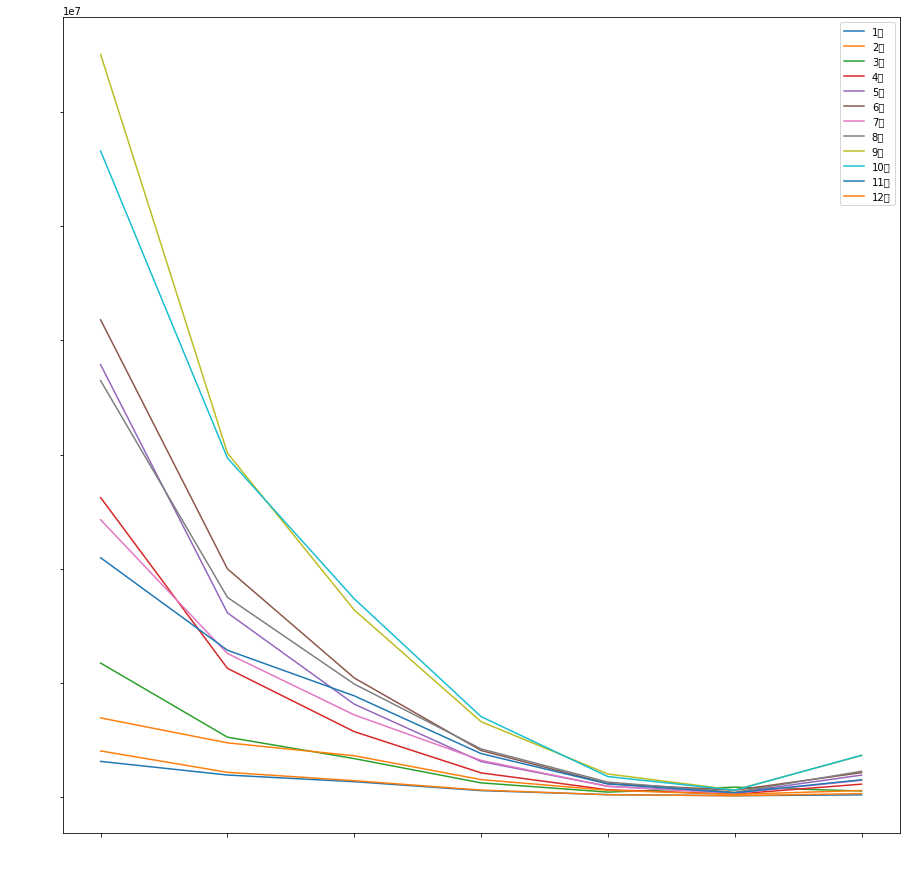

In [22]:
plt.figure(figsize = (15, 15))
years=[2017]
months=list(range(1,13))
for year in years:
    for month in months:
        days = ['10대이하', '20대', '30대', '40대', '50대', '60대', '70대이상']
        dats = new_data.loc[year,month]['sum']['사용시간(분)']/100000
        plt.plot(days, dats*100000)
plt.xlabel('연령대별', fontsize=20, color='white')
plt.ylabel('사용시간', fontsize=20, color='white')
plt.xticks(fontsize=16, color='white')
plt.yticks(fontsize=16, color='white')
plt.legend(['1월', '2월','3월', '4월','5월', '6월','7월', '8월','9월', '10월','11월', '12월'])
plt.show() # 꺽은선 그래프